# Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold

# Part A

### 1. Reading datasets.

In [2]:
# Reading datasets
train_df1 = pd.read_csv("train1.csv") 
train_df2 = pd.read_csv("train2.csv")

# Drop the index column
train_df1.drop(['Unnamed: 0'] , axis = 1 , inplace= True)
train_df2.drop(['Unnamed: 0'] , axis = 1 , inplace= True)

# split featurs and labels
X_train_df1 = train_df1.values[:,:-1]
y_train_df1 = train_df1.values[:,-1]

X_train_df2 = train_df2.values[:,:-1]
y_train_df2 = train_df2.values[:,-1]

In [3]:
# checking that data is ok
train_df1.head()

,x1,x2,y
0,1.143987,0.339646,0.0
1,2.284493,1.129224,0.0
2,1.053601,0.573296,0.0
3,-0.652288,3.116746,1.0
4,-0.223255,3.463650,1.0


### 2. For each class , calculate and visualize covariance matrix.

In [4]:
def calc_cov(df):
    cov_class_0 = df[df['y'] ==0][["x1" , "x2"]].cov().to_numpy()
    cov_class_1 = df[df['y'] ==1][["x1" , "x2"]].cov().to_numpy()
    return [cov_class_0, cov_class_1]

# calculation
cov_list_df1 = calc_cov(train_df1)
cov_list_df2 = calc_cov(train_df2)

Plot1. Cov class 0 df1:


C:\Users\Windows\AppData\Local\Temp/ipykernel_8364/646880799.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
C:\Users\Windows\AppData\Local\Temp/ipykernel_8364/646880799.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


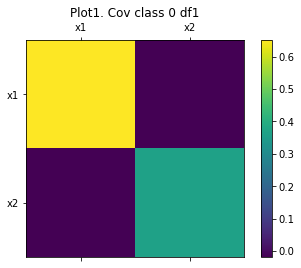

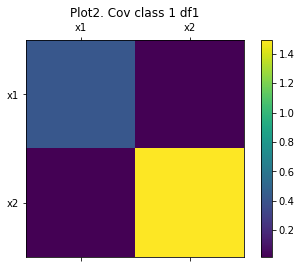

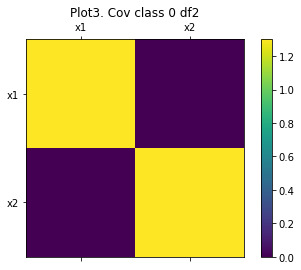

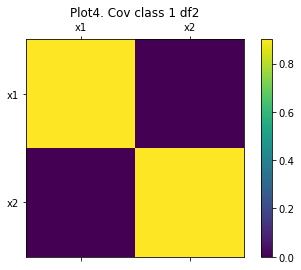

In [5]:
def plot_cov(cov_mtrx):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov_mtrx,interpolation='nearest')
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)

    
print("Plot1. Cov class 0 df1:")
plot_cov(cov_list_df1[0])
plt.gca().set(title='Plot1. Cov class 0 df1')
plt.show()

plot_cov(cov_list_df1[1])
plt.gca().set(title='Plot2. Cov class 1 df1')
plt.show()

plot_cov(cov_list_df2[0])
plt.gca().set(title='Plot3. Cov class 0 df2')
plt.show()

plot_cov(cov_list_df2[1])
plt.gca().set(title='Plot4. Cov class 1 df2')
plt.show()


#### The covariance matrix is symmetric and feature-by-feature shaped. The diagonal contains the variance of a single feature, whereas the non-diagonal entries contain the covariance.
#### Plot1 for class 0, shows that correlation between different features are low and high variance exist in x1 feature. This can been seen clealy in part 4 plots that variance of blue class (class 0) in x1 axis is higher than x2 axis. 
#### Plot2 also have same interpretation in x2 feature.
#### Plot3 and Plot4 have high variance in x1 and x2 feature and approximately equal. 

### 3. Plot Histograms.

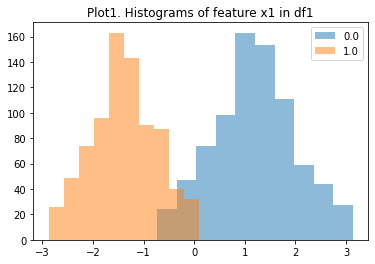

In [6]:
groups = train_df1.groupby("y")
for name, group in groups:
    a = plt.hist(group['x1'] , alpha=0.5 , label=name)
    plt.gca().set(title='Plot1. Histograms of feature x1 in df1')

plt.legend()

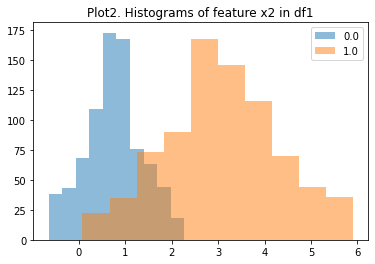

In [7]:
groups = train_df1.groupby("y")
for name, group in groups:
    a = plt.hist(group['x2'] , alpha=0.5 , label=name)
    plt.gca().set(title='Plot2. Histograms of feature x2 in df1')

plt.legend()

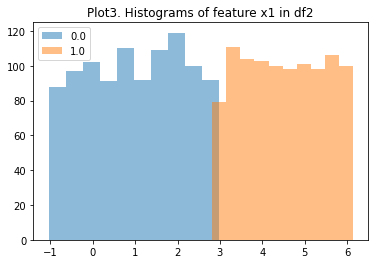

In [8]:
groups = train_df2.groupby("y")
for name, group in groups:
    a = plt.hist(group['x1'] , alpha=0.5 , label=name)
    plt.gca().set(title='Plot3. Histograms of feature x1 in df2')

plt.legend()

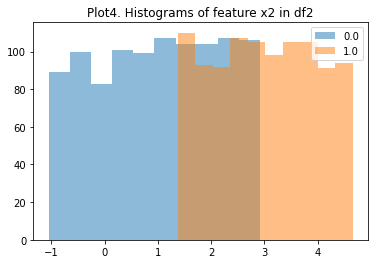

In [9]:
groups = train_df2.groupby("y")
for name, group in groups:
    a = plt.hist(group['x2'] , alpha=0.5 , label=name)
    plt.gca().set(title='Plot4. Histograms of feature x2 in df2')

plt.legend()

#### Plot1 and Plot2 show that feature x1 and x2 in class 0 and 1 have near normal distribution. but in Plot3 and Plot4 show that features have uniform distribution. 
#### In Plot1 and Plot2 we see that histograms have small overlap so this datapoints cant clealy seprable. Plot3 hase small overlap so this means df2 is better seprable according to x1. 

### 4. Plot training data.

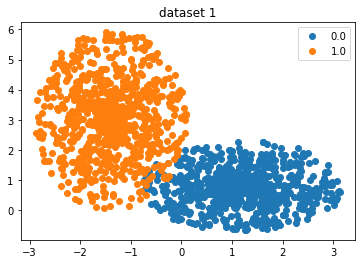

In [10]:
groups = train_df1.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    plt.gca().set(title='dataset 1')

plt.legend()

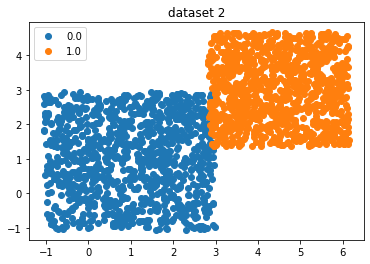

In [11]:
groups = train_df2.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    plt.gca().set(title='dataset 2')

plt.legend()

# Part B

### 1. Calculate mean, for each class.

In [12]:
def calc_mu(dataset):
    m_class0 = [dataset[dataset['y'] ==0]['x1'].mean() , dataset[dataset['y'] ==0]['x2'].mean()]
    m_class1 = [dataset[dataset['y'] ==1]['x1'].mean() , dataset[dataset['y'] ==1]['x2'].mean()]
    return [m_class0 , m_class1]

# calc mu
mu_list_df1 = calc_mu(train_df1)
mu_list_df2 = calc_mu(train_df2)

In [13]:
print("informations in index 0 related to class 0 and index 1 related to class 1.")
print()
print("mean df1:", mu_list_df1)
print("mean df2:", mu_list_df2)
print()
print("Cov df1:")
print(cov_list_df1)
print("Cov df2:")
print(cov_list_df2)

informations in index 0 related to class 0 and index 1 related to class 1.

mean df1: [[1.188145561795951, 0.744423157365777], [-1.384668416475425, 3.071031116789257]]
mean df2: [[1.0000000000000047, 0.9999999999999989], [4.500000000000005, 2.9999999999999982]]

Cov df1:
[array([[ 0.65160952, -0.01944138],
       [-0.01944138,  0.36506496]]), array([[0.41319973, 0.01333729],
       [0.01333729, 1.49504785]])]
Cov df2:
[array([[ 1.29952458e+00, -3.20601159e-05],
       [-3.20601159e-05,  1.30047560e+00]]), array([[ 8.99978203e-01, -1.96515212e-05],
       [-1.96515212e-05,  9.00021797e-01]])]


In [14]:
# calculate prior
p_c0_df1 = train_df1[train_df1['y'] == 0].shape[0]/train_df1.shape[0]
p_c1_df1 = train_df1[train_df1['y'] == 1].shape[0]/train_df1.shape[0]
p_c0_df2 = train_df2[train_df2['y'] == 0].shape[0]/train_df2.shape[0]
p_c1_df2 = train_df2[train_df2['y'] == 1].shape[0]/train_df2.shape[0]

print(p_c0_df1 , p_c1_df1 , p_c0_df2 , p_c1_df2)

0.5 0.5 0.5 0.5


### 2. Calculate discriminant function g(x).

In [15]:
# different mean but variance is constant in each class
def calc_case1(x, mu, covar , p_ci):
    a = np.transpose(x - mu)
    b = 1/covar[0][0] # constant variance
    c = x - mu
    d = np.matmul(a, c)
    f = -0.5 * b * d
    
    g = -0.5* np.log(np.linalg.det(covar)) # this is not elimininated because in differenct class we have different variances
    
    h = np.log(p_ci)
    
    return f + g + h

In [16]:
def calc_case2(x, mu, covar , p_ci):
    a = np.transpose(x - mu)
    b = np.linalg.inv(covar)
    c = x - mu
    d = np.matmul(a, b)
    e = np.matmul(d, c)
    f = -0.5 * e
    
    g = -0.5* np.log(np.linalg.det(covar))
    
    h = np.log(p_ci)
    
    return f + g + h

In [17]:
def trainBayes(x , mu_list, cov_list , p_list):
    classes = len(mu_list)
    g = []
    for c in range(classes):
        cov_matrix = cov_list[c]
        if abs(cov_matrix[0][0] - cov_matrix[1][1]) <= 1e-3: # features have equal variance in each class
            score = calc_case1(x, mu_list[c] , cov_list[c] , p_list[c])
            g.append(score) 
        else:
            score = calc_case2(x , mu_list[c] , cov_list[c] , p_list[c] )
            g.append(score)
    
    return np.argmax(g)

### 3. test

In [18]:
test_df1 = pd.read_csv("test1.csv") 
test_df2 = pd.read_csv("test2.csv")

# Drop the index column
test_df1.drop(['Unnamed: 0'] , axis = 1 , inplace= True)
test_df2.drop(['Unnamed: 0'] , axis = 1 , inplace= True)

# split featurs and labels
X_test_df1 = test_df1.values[:,:-1]
y_test_df1 = test_df1.values[:,-1]

# split featurs and labels
X_test_df2 = test_df2.values[:,:-1]
y_test_df2 = test_df2.values[:,-1]

In [19]:
# testing dataset 1
Y_pred_df1 = np.array([trainBayes(x,mu_list_df1,cov_list_df1 , [p_c0_df1 , p_c1_df1]) for x in X_test_df1] )
acc_df1 = np.sum(Y_pred_df1 == y_test_df1)/len(y_test_df1)
print("accuracy:" , acc_df1)
err_df1 = np.sum(Y_pred_df1 != y_test_df1)/len(y_test_df1)
print("error: " ,err_df1)

accuracy: 0.995
error:  0.005


In [20]:
# testing dataset 2
Y_pred_df2 = np.array([trainBayes(x,mu_list_df2,cov_list_df2 , [p_c0_df2 , p_c1_df2]) for x in X_test_df2] )
acc_df2 = np.sum(Y_pred_df2 == y_test_df2)/len(y_test_df2)
print("accuracy:" , acc_df2)
err_df2 = np.sum(Y_pred_df2 != y_test_df2)/len(y_test_df2)
print("error: " ,err_df2)

accuracy: 0.975
error:  0.025


# Part C: 3 fold cross validation

### 1. Combining train and test dataset

In [21]:
# concatination
df1 = pd.concat([train_df1 , test_df1] , axis = 0).reset_index(drop = True)
df2 = pd.concat([train_df2 , test_df2] , axis = 0).reset_index(drop = True)

# split featurs and labels
X1 = df1.values[:,:-1]
y1 = df1.values[:,-1]

X2 = df2.values[:,:-1]
y2 = df2.values[:,-1]

In [22]:
df1.head()

,x1,x2,y
0,1.143987,0.339646,0.0
1,2.284493,1.129224,0.0
2,1.053601,0.573296,0.0
3,-0.652288,3.116746,1.0
4,-0.223255,3.463650,1.0


### 2. Apply 3-fold cross validation

In [23]:
def Perform_Kfold(df,  k):  
    kf = KFold(n_splits=3 , random_state = 314 , shuffle = True) # 3-fold
    all_errs = 0
    fold = 1

    for train_index, test_index in kf.split(df.values):
        train_df = df.loc[list(train_index) , :]
        test_df = df.loc[list(test_index) , :]
        
        # get mu and cov if train part
        mu_list = calc_mu(train_df)
        cov_list = calc_cov(train_df)
        
        # split featurs and labels
        X_test = test_df.values[:,:-1]
        y_test = test_df.values[:,-1]
        
        # priors
        p_c0 = train_df[train_df['y'] == 0].shape[0]/train_df.shape[0]
        p_c1 = train_df[train_df['y'] == 1].shape[0]/train_df.shape[0]

        # perform bayes classifier
        Y_pred = np.array([trainBayes(x,mu_list,cov_list , [p_c0 , p_c1]) for x in X_test] )
        
        # Evaluation
        err = np.sum(Y_pred != y_test)/len(y_test)
        
        print("error in fold %d: %.4f" %(fold ,err))
        
        all_errs+=err
        fold+=1
    print("mean error" , all_errs/k)


In [24]:
# perfom kfold on dataset1
Perform_Kfold(df1, k = 3)

error in fold 1: 0.0165
error in fold 2: 0.0135
error in fold 3: 0.0075
mean error 0.012497505001253127


In [25]:
# perfom kfold on dataset2
Perform_Kfold(df2, k = 3)

error in fold 1: 0.0163
error in fold 2: 0.0175
error in fold 3: 0.0163
mean error 0.016666666666666666


#### K-fold is most reliable because in each fold, dataset split differently than other folds and train K times and averaging results can reduce the unreliability.  

# Part D: Semi-Supervised learning

### 1. plot dataset 3

In [26]:
train_df3 = pd.read_csv("train3.csv")
train_df3.drop(['Unnamed: 0'] , axis = 1 , inplace= True)

In [27]:
train_df3

,x1,x2,y
0,2.328009,-0.054717,0.0
1,-0.826687,4.044049,1.0
2,-1.367783,2.711673,1.0
3,1.181950,0.929444,0.0
4,-1.632349,3.952147,1.0
...,...,...,...
795,-1.182370,2.306965,1.0
796,-1.356024,2.949347,1.0
797,1.178004,0.776796,0.0
798,-1.261943,2.137456,1.0


In [28]:
# split featurs and labels
X_test_df3 = train_df3.values[:,:-1]
y_test_df3 = train_df3.values[:,-1]

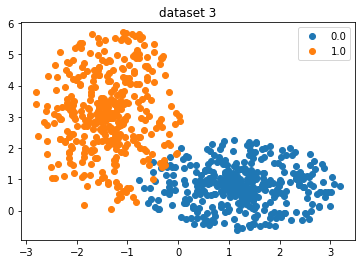

In [29]:
groups = train_df3.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    plt.gca().set(title='dataset 3')

plt.legend()

#### Dataset 3 plot is so simlar to Dataset 1 plot. this means that distributions are similar.

### 2. Train df1, Test df3

In [30]:
mu_list_df1 = calc_mu(train_df1)
cov_list_df1 = calc_cov(train_df1)

In [31]:
Y_pred_df3 = np.array([trainBayes(x,mu_list_df1,cov_list_df1 , [p_c0_df1 , p_c1_df1]) for x in X_test_df3] )
acc_df3 = np.sum(Y_pred_df3 == y_test_df3)/len(y_test_df3)
print("accuracy:" , acc_df3)

accuracy: 0.98875


In [32]:
# assiging pseudo-labels
train_df3['y'] = Y_pred_df3

In [33]:
# check pseudo-labels
train_df3

,x1,x2,y
0,2.328009,-0.054717,0
1,-0.826687,4.044049,1
2,-1.367783,2.711673,1
3,1.181950,0.929444,0
4,-1.632349,3.952147,1
...,...,...,...
795,-1.182370,2.306965,1
796,-1.356024,2.949347,1
797,1.178004,0.776796,0
798,-1.261943,2.137456,1


In [34]:
# concat 2 dataset as a new dataset. train_df3 has pseudo-labels
new_data = pd.concat([train_df1 , train_df3] , axis = 0).reset_index(drop = True)

In [35]:
# calculate mu an cov of new data
mu_list_new_data = calc_mu(new_data)
cov_list_new_data = calc_cov(new_data)

# calculate prior
p_c0_new_data = new_data[new_data['y'] == 0].shape[0]/new_data.shape[0]
p_c1_new_data = new_data[new_data['y'] == 1].shape[0]/new_data.shape[0]

In [36]:
# test on df1 test datset
Y_pred_df1 = np.array([trainBayes(x,mu_list_new_data,cov_list_new_data , [p_c0_new_data , p_c1_new_data]) for x in X_test_df1] )

In [40]:
err_df1 = np.sum(Y_pred_df1 != y_test_df1)/len(y_test_df1)
print("error:" , err_df1)

error: 0.01


#### We can see that error is a little beat increase and this is beacuse of pseudo-labels is not perfect labels so a little noise exist in train part. 